Nama: Mohammad Daffa Gashandy

NIM: 20/455449/PA/19664

Kelas: KOM

# Code

a) Load Library, Mount Drive, & Import Image

In [ ]:
import matplotlib.pyplot as plt # Graph & Other Visualizations
import cv2 as cv # Import Image & Color Manipulations

# Import from Drive
from google.colab import drive
drive.mount('/content/drive')

def implotc(img):
  plt.imshow(img)
  plt.axis('off')

def implotg(img):
  plt.imshow(img, cmap='gray', vmin=0, vmax=255)
  plt.axis('off')

Mounted at /content/drive


In [ ]:
# Import Image
img = cv.imread('/content/drive/MyDrive/Pict/yoru_mask.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imgbnw = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

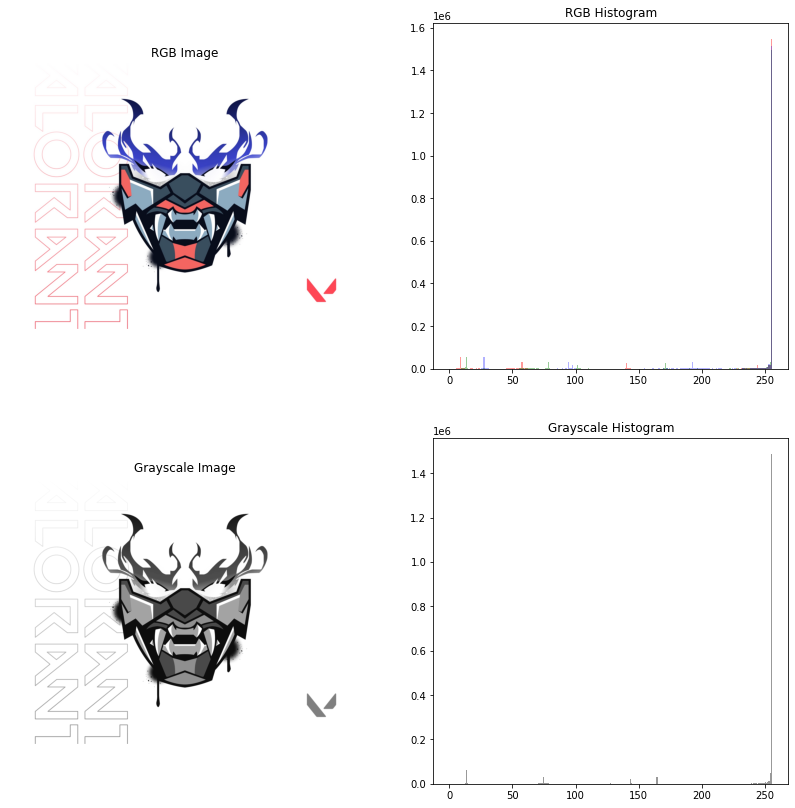

In [ ]:
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.title('RGB Image')
implotc(img)
plt.subplot(222)
plt.title('RGB Histogram')
plt.hist(img[:,:,0].ravel(), bins=256, range=(0, 256), color='red', alpha = 0.4)
plt.hist(img[:,:,1].ravel(), bins=256, range=(0, 256), color='green', alpha = 0.4)
plt.hist(img[:,:,2].ravel(), bins=256, range=(0, 256), color='blue', alpha = 0.3)
plt.subplot(223)
plt.title('Grayscale Image')
implotg(imgbnw)
plt.subplot(224)
plt.title('Grayscale Histogram')
plt.hist(imgbnw.ravel(), bins=256, range=(0, 256), color='black', alpha=0.4)
plt.show()

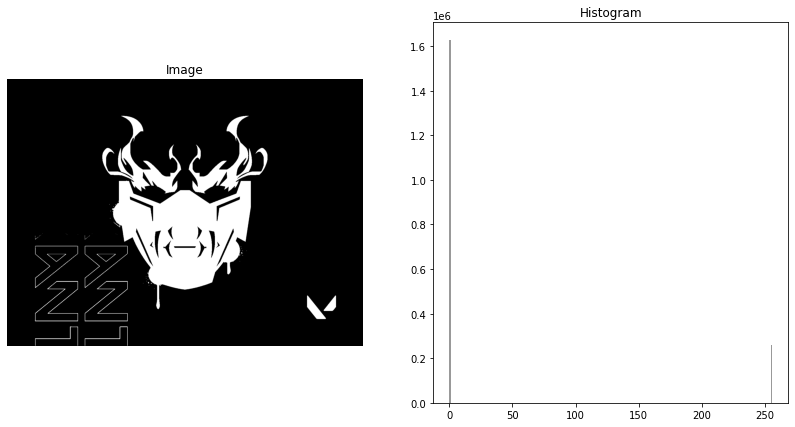

In [ ]:
imgp = imgbnw.copy()
rows = img.shape[0]
cols = img.shape[1]

for i in range (rows):
  for j in range (cols):
    if imgp[i][j]<180:
      imgp[i][j] = 255
    else:
      imgp[i][j] = 0

plt.figure(figsize=(14,7))
plt.subplot(121)
plt.title('Image')
implotg(imgp)
plt.subplot(122)
plt.title('Histogram')
plt.hist(imgp.ravel(), bins=256, range=(0, 256), color='black', alpha=0.4)
plt.show()

In [ ]:
def convolution(src, kernel):
  res = np.zeros((src.shape[0],src.shape[1]))
  ks = kernel.shape[0]
  kv = np.sum(kernel)
  src = np.pad(src, int((ks-1)/2), 'constant',  constant_values=0)
  sr = src.shape[0]
  sc = src.shape[1]

  for i in range(sr-(ks-1)):
    for j in range(sc-(ks-1)):
      region=src[i:(i+ks), j:(j+ks)]
      x = 0
      for k in range(ks):
        for l in range(ks):
          x = x + (region[k][l]*kernel[k][l])
      res[i][j]=x/kv
      
  return(res)
  
def dilation(src, kernel):  
  res = convolution(src, kernel)
  for i in range(res.shape[0]):
    for j in range(res.shape[1]):
      if(res[i][j]>0):
        res[i][j] = 255
      else:
        res[i][j] = 0
  return(res)
  
def erosion(src, kernel):  
  res = convolution(src, kernel)
  for i in range(res.shape[0]):
    for j in range(res.shape[1]):
      if(res[i][j]<255):
        res[i][j] = 0
      else:
        res[i][j] = 255
  return(res)
  
def opening(src, kernel):  
  res = erosion(src, kernel)
  res = dilation(res, kernel)
  return(res)
  
def closing(src, kernel):  
  res = dilation(src, kernel)
  res = erosion(res, kernel)
  return(res)

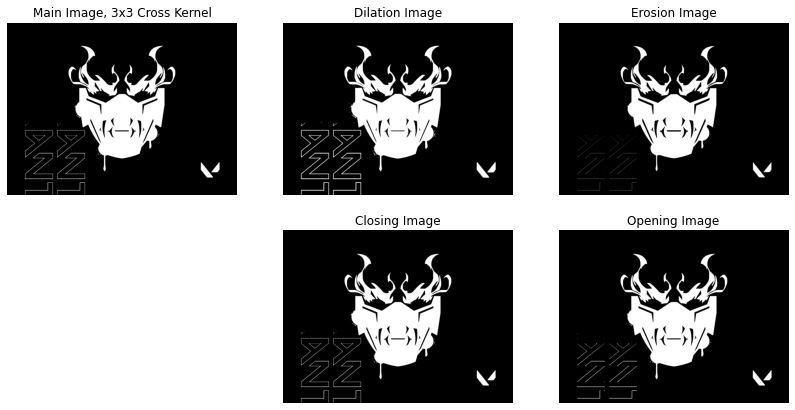

In [ ]:
import numpy as np

kernelCross = np.array([[0,1,0],[1,1,1],[0,1,0]])

imgDil = dilation(imgp,kernelCross)
imgEro = erosion(imgp,kernelCross)
imgOpe = opening(imgp,kernelCross)
imgClo = closing(imgp,kernelCross)

plt.figure(figsize=(14,7))
plt.subplot(231)
plt.title('Main Image, 3x3 Cross Kernel')
implotg(imgp)
plt.subplot(232)
plt.title('Dilation Image')
implotg(imgDil)
plt.subplot(233)
plt.title('Erosion Image')
implotg(imgEro)
plt.subplot(235)
plt.title('Closing Image')
implotg(imgClo)
plt.subplot(236)
plt.title('Opening Image')
implotg(imgOpe)
plt.show()

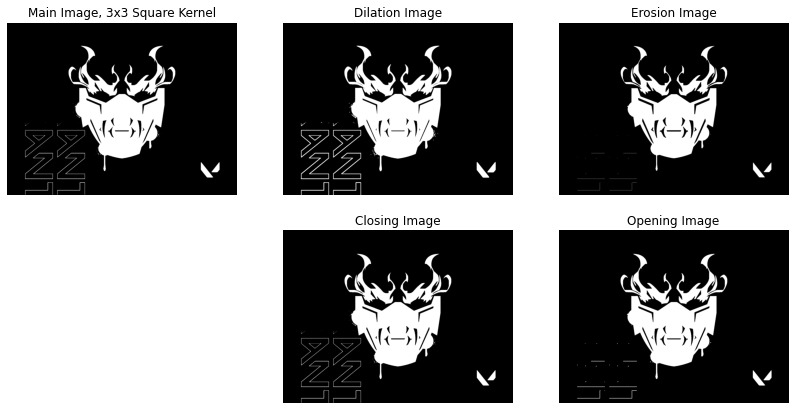

In [ ]:
kernelSquare = np.array([[1,1,1],[1,1,1],[1,1,1]])

imgDil = dilation(imgp,kernelSquare)
imgEro = erosion(imgp,kernelSquare)
imgOpe = opening(imgp,kernelSquare)
imgClo = closing(imgp,kernelSquare)

plt.figure(figsize=(14,7))
plt.subplot(231)
plt.title('Main Image, 3x3 Square Kernel')
implotg(imgp)
plt.subplot(232)
plt.title('Dilation Image')
implotg(imgDil)
plt.subplot(233)
plt.title('Erosion Image')
implotg(imgEro)
plt.subplot(235)
plt.title('Closing Image')
implotg(imgClo)
plt.subplot(236)
plt.title('Opening Image')
implotg(imgOpe)
plt.show()

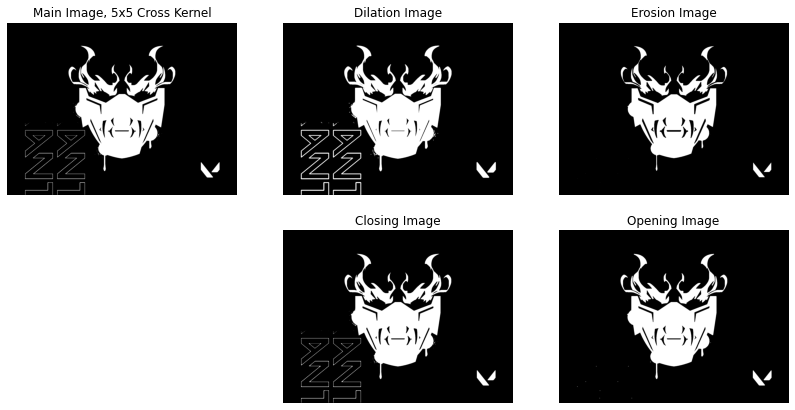

In [ ]:
kernelCross5 = np.array([[0,0,1,0,0],[0,0,1,0,0],[1,1,1,1,1],[0,0,1,0,0],[0,0,1,0,0]])

imgDil = dilation(imgp,kernelCross5)
imgEro = erosion(imgp,kernelCross5)
imgOpe = opening(imgp,kernelCross5)
imgClo = closing(imgp,kernelCross5)

plt.figure(figsize=(14,7))
plt.subplot(231)
plt.title('Main Image, 5x5 Cross Kernel')
implotg(imgp)
plt.subplot(232)
plt.title('Dilation Image')
implotg(imgDil)
plt.subplot(233)
plt.title('Erosion Image')
implotg(imgEro)
plt.subplot(235)
plt.title('Closing Image')
implotg(imgClo)
plt.subplot(236)
plt.title('Opening Image')
implotg(imgOpe)
plt.show()

In [ ]:
kernelSquare5 = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

imgDil = dilation(imgp,kernelSquare5)
imgEro = erosion(imgp,kernelSquare5)
imgOpe = opening(imgp,kernelSquare5)
imgClo = closing(imgp,kernelSquare5)

plt.figure(figsize=(14,7))
plt.subplot(231)
plt.title('Main Image, 5x5 Cross Kernel')
implotg(imgp)
plt.subplot(232)
plt.title('Dilation Image')
implotg(imgDil)
plt.subplot(233)
plt.title('Erosion Image')
implotg(imgEro)
plt.subplot(235)
plt.title('Closing Image')
implotg(imgClo)
plt.subplot(236)
plt.title('Opening Image')
implotg(imgOpe)
plt.show()